# Housing Price Prediction Analysis

## Objectives

* To explore and clean the housing dataset, preparing it for analysis.
* To visualize correlations between various house attributes and sale prices.
* To build predictive models to forecast housing prices based on selected features.

## Inputs

* Housing dataset sourced from [Kaggle](https://www.kaggle.com/codeinstitute/housing-prices-data).
* Python libraries: numpy, pandas, matplotlib, seaborn, ydata-profiling, plotly, ppscore, streamlit, feature-engine, imbalanced-learn, scikit-learn, xgboost, yellowbrick, Jinja2,          MarkupSafe, protobuf, ipywidgets, altair.
* Datasets:
  - `house_prices_records.csv`: Contains historical housing data including various features and sale prices.
  - `inherited_houses.csv`: Contains data for the inherited houses for which we want to predict sale prices.


## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Section 1

Load required libraries.

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

---

# Section 2

Loading first five rows from datasets.

In [11]:
import pandas as pd

# Load the datasets
inherited_houses_path = '/workspace/house_project1/data/inherited_houses.csv'
house_prices_records_path = '/workspace/house_project1/data/house_prices_records.csv'

inherited_houses_df = pd.read_csv(inherited_houses_path)
house_prices_df = pd.read_csv(house_prices_records_path)

# Display the first few rows of each dataset
print("Inherited Houses Data:")
print(inherited_houses_df.head())

print("\nHouse Prices Records Data:")
print(house_prices_df.head())


Inherited Houses Data:
   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       896         0             2           No       468.0          Rec   
1      1329         0             3           No       923.0          ALQ   
2       928       701             3           No       791.0          GLQ   
3       926       678             3           No       602.0          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotArea  \
0      270.0              0       730.0          Unf  ...    11622   
1      406.0              0       312.0          Unf  ...    14267   
2      137.0              0       482.0          Fin  ...    13830   
3      324.0              0       470.0          Fin  ...     9978   

   LotFrontage MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
0         80.0        0.0            0            6            5        882.0   
1         81.0      108.0           36            6            6       1329.0 

 Data Cleaning & Preperation 

In [31]:
# Step 3: Advanced Data Cleaning and Preparation for Both Files

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
inherited_houses_df = pd.read_csv('/workspace/house_project1/data/inherited_houses.csv')
house_prices_df = pd.read_csv('/workspace/house_project1/data/house_prices_records.csv')

# Function to clean inherited houses data
def clean_inherited_houses(data):
    # Check for missing values
    print("Missing values in inherited houses:\n", data.isnull().sum())

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values in Inherited Houses Data')
    plt.show()

    # Fill missing values for numerical and categorical features
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    for column in data.select_dtypes(include=[object]).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    # Check data types and convert if necessary
    print("Data types in inherited houses:\n", data.dtypes)
   
    # Convert categorical variables to 'category' dtype
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')

    # Detect and remove outliers using IQR method
    def detect_outliers_iqr(data):
        outlier_indices = []
        for col in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
            outlier_indices.extend(outliers.index.tolist())
        return set(outlier_indices)

    outlier_indices = detect_outliers_iqr(data)

    # Remove outliers
    data = data.drop(index=outlier_indices)
    print(f"Number of outliers removed from inherited houses: {len(outlier_indices)}")

    # Feature engineering: Create HouseAge feature
    if 'YearBuilt' in data.columns:  # Ensure YearBuilt exists
        data['HouseAge'] = 2024 - data['YearBuilt']

    # Prepare the feature set and target variable
    X_inherited = data.drop(['SalePrice'], axis=1)  # Replace 'SalePrice' accordingly
    y_inherited = data['SalePrice']

    # Encode categorical variables
    X_inherited = pd.get_dummies(X_inherited, drop_first=True)

    print("Final feature set shape for inherited houses:", X_inherited.shape)
    print("First few rows of features for inherited houses:\n", X_inherited.head())

    return X_inherited, y_inherited


Missing values in inherited houses:
 1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtUnfSF        0
EnclosedPorch    0
GarageArea       0
GarageFinish     0
GarageYrBlt      0
GrLivArea        0
KitchenQual      0
LotArea          0
LotFrontage      0
MasVnrArea       0
OpenPorchSF      0
OverallCond      0
OverallQual      0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
dtype: int64


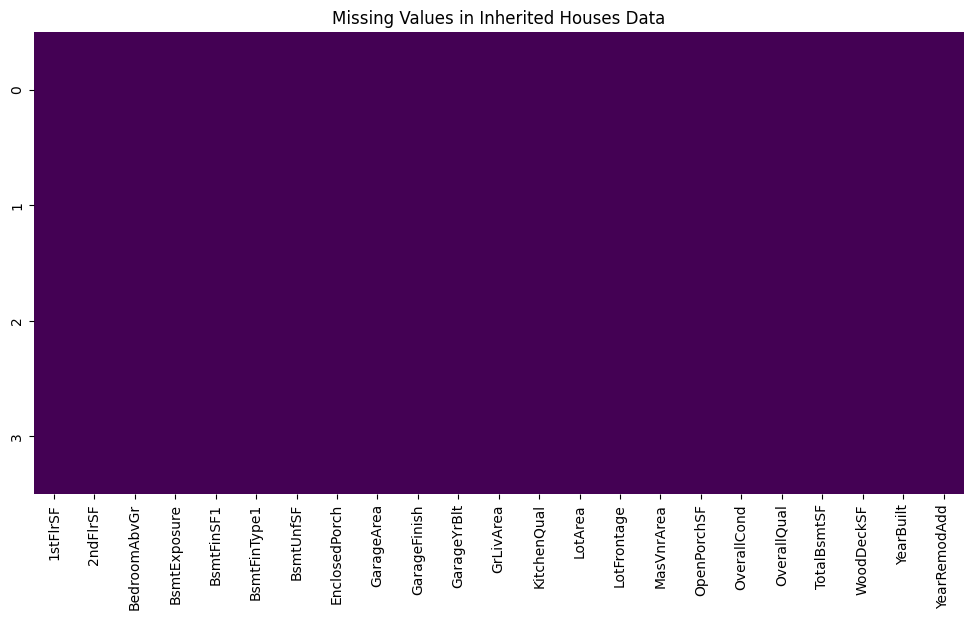

Number of outliers removed from inherited houses: 3
Final feature set shape for inherited houses: (1, 24)
First few rows of features for inherited houses:
    1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  EnclosedPorch  \
3       926       678             3       602.0      324.0              0   

   GarageArea  GarageYrBlt  GrLivArea  LotArea  ...  OverallQual  TotalBsmtSF  \
3       470.0       1998.0       1604     9978  ...            6        926.0   

   WoodDeckSF  YearBuilt  YearRemodAdd  HouseAge  BsmtFinType1_GLQ  \
3         360       1998          1998        26              True   

   BsmtFinType1_Rec  GarageFinish_Unf  KitchenQual_TA  
3             False             False           False  

[1 rows x 24 columns]


In [26]:
# Function to clean inherited houses data
def clean_inherited_houses(data):
    # Check for missing values
    print("Missing values in inherited houses:\n", data.isnull().sum())

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values in Inherited Houses Data')
    plt.show()

    # Fill missing values for numerical and categorical features
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    for column in data.select_dtypes(include=[object]).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    # Convert categorical variables to 'category' dtype
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')

    # Detect and remove outliers using IQR method
    def detect_outliers_iqr(data):
        outlier_indices = []
        for col in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
            outlier_indices.extend(outliers.index.tolist())
        return set(outlier_indices)

    outlier_indices = detect_outliers_iqr(data)

    # Remove outliers
    data = data.drop(index=outlier_indices)
    print(f"Number of outliers removed from inherited houses: {len(outlier_indices)}")

    # Feature engineering: Create HouseAge feature
    if 'YearBuilt' in data.columns:  # Ensure YearBuilt exists
        data['HouseAge'] = 2024 - data['YearBuilt']

    # Prepare the feature set
    X_inherited = data

    # Encode categorical variables
    X_inherited = pd.get_dummies(X_inherited, drop_first=True)

    print("Final feature set shape for inherited houses:", X_inherited.shape)
    print("First few rows of features for inherited houses:\n", X_inherited.head())

    return X_inherited

# Clean the inherited houses dataset
X_inherited = clean_inherited_houses(inherited_houses_df)

Missing values in house prices:
 1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure       38
BsmtFinSF1          0
BsmtFinType1      145
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      235
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64


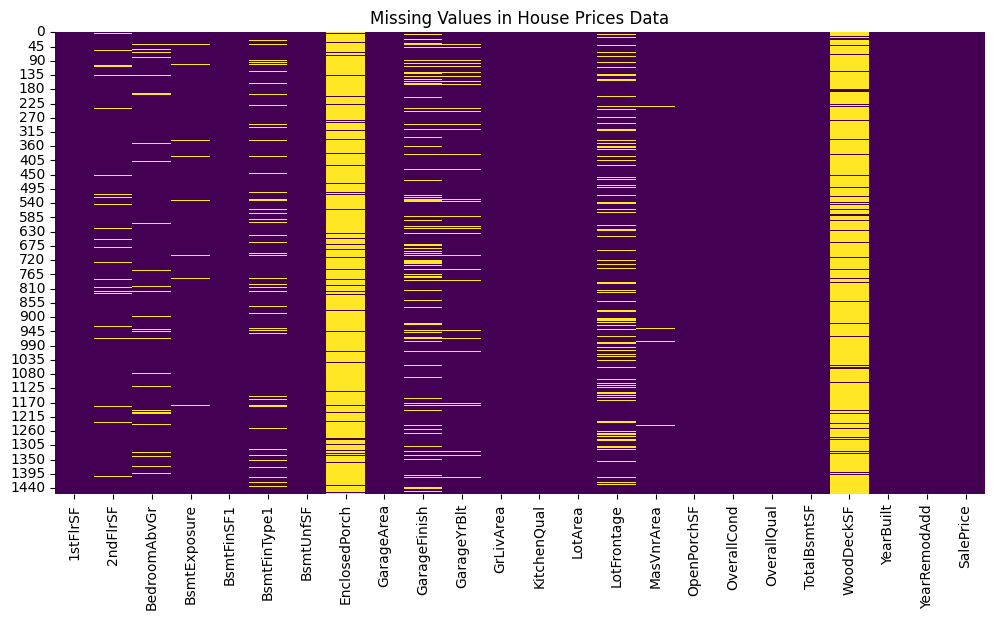

Final feature set shape for house prices: (1460, 33)
First few rows of features for house prices:
    1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  EnclosedPorch  \
0       856     854.0           3.0         706        150            0.0   
1      1262       0.0           3.0         978        284            0.0   
2       920     866.0           3.0         486        434            0.0   
3       961       0.0           3.0         216        540            0.0   
4      1145       0.0           4.0         655        490            0.0   

   GarageArea  GarageYrBlt  GrLivArea  LotArea  ...  BsmtFinType1_BLQ  \
0         548       2003.0       1710     8450  ...             False   
1         460       1976.0       1262     9600  ...             False   
2         608       2001.0       1786    11250  ...             False   
3         642       1998.0       1717     9550  ...             False   
4         836       2000.0       2198    14260  ...             False   


In [27]:
# Function to clean house prices data
def clean_house_prices(data):
    # Check for missing values
    print("Missing values in house prices:\n", data.isnull().sum())

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values in House Prices Data')
    plt.show()

    # Fill missing values for numerical features with median
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    # Encode categorical variables
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')
    data = pd.get_dummies(data, drop_first=True)

    print("Final feature set shape for house prices:", data.shape)
    print("First few rows of features for house prices:\n", data.head())

    return data

# Clean the house prices dataset
house_prices_df_cleaned = clean_house_prices(house_prices_df)

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
inherited_houses_df = pd.read_csv('/workspace/house_project1/data/inherited_houses.csv')

# Function to handle missing values
def handle_missing_values(data, num_imputation='median', cat_imputation='mode'):
    for column in data.select_dtypes(include=[np.number]).columns:
        if num_imputation == 'mean':
            data[column].fillna(data[column].mean(), inplace=True)
        elif num_imputation == 'median':
            data[column].fillna(data[column].median(), inplace=True)
        elif num_imputation == 'constant':
            data[column].fillna(0, inplace=True)  # Example constant
   
    for column in data.select_dtypes(include=[object]).columns:
        if cat_imputation == 'mode':
            data[column].fillna(data[column].mode()[0], inplace=True)
        elif cat_imputation == 'constant':
            data[column].fillna('Unknown', inplace=True)  # Example constant

    return data

# Function to remove outliers using multiple methods
def remove_outliers(data, method='IQR'):
    if method == 'IQR':
        for col in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    elif method == 'Z-score':
        from scipy import stats
        z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
        data = data[(z_scores < 3).all(axis=1)]
    elif method == 'IsolationForest':
        iso = IsolationForest(contamination=0.05)  # Adjust contamination as needed
        preds = iso.fit_predict(data.select_dtypes(include=[np.number]))
        data = data[preds != -1]
   
    return data

# Function to normalize features
def normalize_features(data, method='standard'):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
   
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    return data

# Function to clean inherited houses data
def clean_inherited_houses(data, num_imputation='median', cat_imputation='mode', outlier_method='IQR', normalization_method='standard'):
    print("Initial shape of the dataset:", data.shape)

    # Step 1: Handle missing values
    data = handle_missing_values(data, num_imputation, cat_imputation)

    # Step 2: Remove outliers
    data = remove_outliers(data, method=outlier_method)

    # Step 3: Feature Engineering
    data['HouseAge'] = 2024 - data['YearBuilt']
    data['TotalArea'] = (data['1stFlrSF'] + data['2ndFlrSF'] +
                         data['TotalBsmtSF'] + data['GarageArea'] +
                         data['WoodDeckSF'] + data['OpenPorchSF'] +
                         data['EnclosedPorch'])

    # Step 4: Encode categorical variables
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')
    data = pd.get_dummies(data, drop_first=True)

    # Step 5: Normalize numerical features
    data = normalize_features(data, method=normalization_method)

    print("\nFinal feature set shape for inherited houses:", data.shape)
    print("First few rows of features for inherited houses:\n", data.head())

    return data

# Clean the inherited houses dataset with different parameters
inherited_houses_df_cleaned = clean_inherited_houses(
    inherited_houses_df,
    num_imputation='median',
    cat_imputation='mode',
    outlier_method='IQR',
    normalization_method='standard'
)

Initial shape of the dataset: (4, 23)

Final feature set shape for inherited houses: (3, 24)
First few rows of features for inherited houses:
    1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  EnclosedPorch  \
0 -1.412011 -1.413624     -1.414214   -1.149686   0.335113            0.0   
2  0.774329  0.742178      0.707107    1.288051  -1.357420            0.0   
3  0.637683  0.671446      0.707107   -0.138365   1.022307            0.0   

   GarageArea  GarageYrBlt  GrLivArea   LotArea  ...  OverallQual  \
0    1.413031    -1.413816  -1.413575 -0.119124  ...    -0.707107   
2   -0.656448     0.677857   0.743574  1.279954  ...    -0.707107   
3   -0.756584     0.735959   0.670001 -1.160830  ...     1.414214   

   TotalBsmtSF  WoodDeckSF  YearBuilt  YearRemodAdd  HouseAge  TotalArea  \
0    -1.413167   -1.062781  -1.413816     -1.414214  1.413816  -1.400782   
2     0.753689   -0.276614   0.677857      0.707107 -0.677857   0.531994   
3     0.659478    1.339396   0.735959      

Initial shape of the dataset: (1460, 24)

Initial Summary Statistics:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1422,1460.000000,1315,1460.000000,136.000000,1460.000000,1225,...,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
unique,NaN,NaN,NaN,4,NaN,6,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,No,NaN,Unf,NaN,NaN,NaN,Unf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,953,NaN,396,NaN,NaN,NaN,546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1162.626712,348.524017,2.869214,NaN,443.639726,NaN,567.240411,25.330882,472.980137,NaN,...,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,NaN,456.098091,NaN,441.866955,66.684115,213.804841,NaN,...,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,NaN,0.000000,NaN,223.000000,0.000000,334.500000,NaN,...,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,NaN,383.500000,NaN,477.500000,0.000000,480.000000,NaN,...,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,NaN,712.250000,NaN,808.000000,0.000000,576.000000,NaN,...,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000


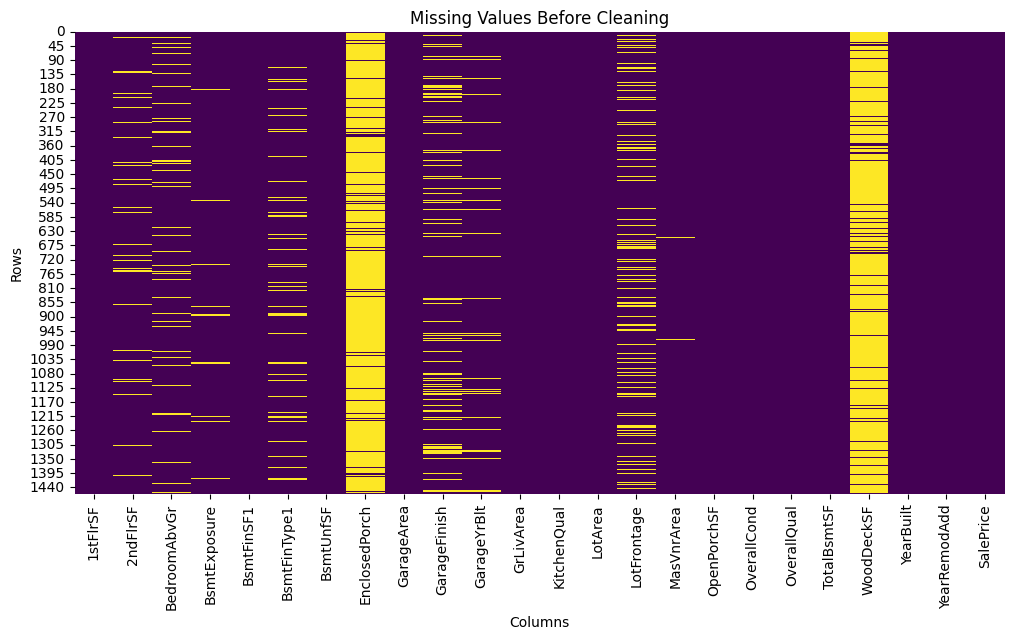

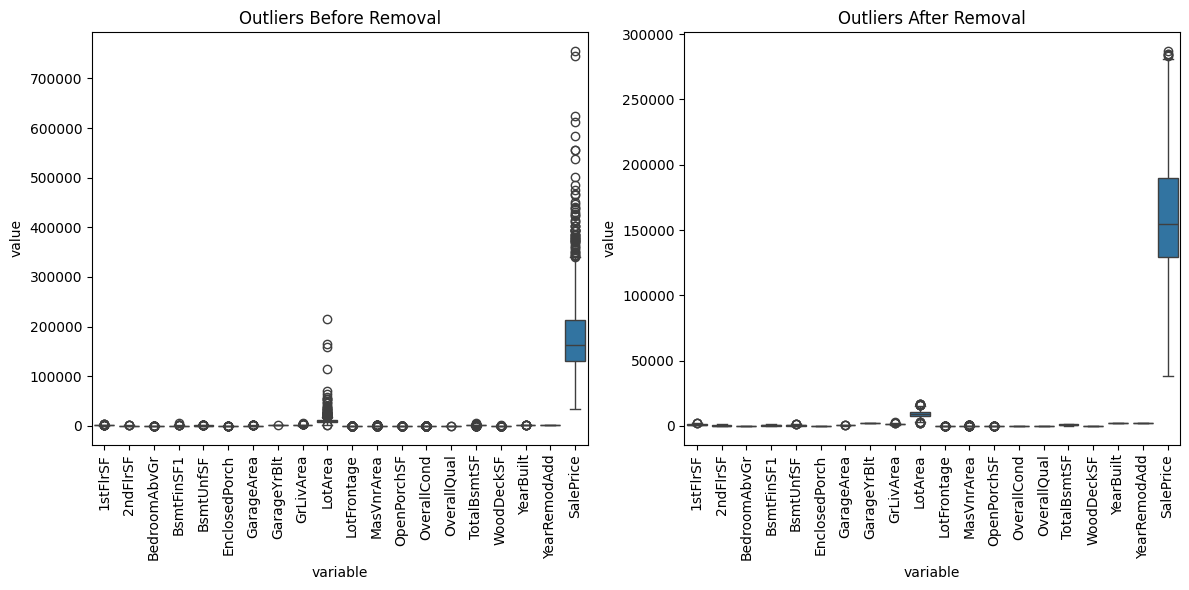


Final Summary Statistics:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
count,8.070000e+02,8.070000e+02,8.070000e+02,8.070000e+02,8.070000e+02,807.0,8.070000e+02,8.070000e+02,8.070000e+02,8.070000e+02,...,807,807,807,807,807,807,807,807,807,807
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,721,611,763,719,532,585,435,786,491,452
mean,-2.415801e-16,-1.760949e-17,3.213731e-16,1.981067e-17,7.043794e-17,0.0,6.163320e-17,4.406774e-15,-1.100593e-16,9.905336e-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.000620e+00,1.000620e+00,1.000620e+00,1.000620e+00,1.000620e+00,0.0,1.000620e+00,1.000620e+00,1.000620e+00,1.000620e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-2.308292e+00,-7.124376e-01,-2.825964e+00,-1.088110e+00,-1.422695e+00,0.0,-2.482788e+00,-2.936971e+00,-2.531629e+00,-2.686119e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-7.824382e-01,-7.124376e-01,-1.261799e+00,-1.088110e+00,-7.878204e-01,0.0,-7.553920e-01,-7.094000e-01,-7.830063e-01,-5.959892e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-1.735295e-01,-7.124376e-01,3.023665e-01,-6.876897e-02,-1.811625e-01,0.0,1.012384e-01,1.156264e-01,-4.945109e-02,-2.574977e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.287974e-01,1.028720e+00,3.023665e-01,7.097827e-01,6.255771e-01,0.0,6.044733e-01,9.406527e-01,7.179397e-01,6.067895e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Final shape of the dataset: (807, 33)


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure this path is correct)
house_prices_df = pd.read_csv('/workspace/house_project1/data/house_prices_records.csv')

# Function to visualize missing values
def visualize_missing_values(data, title='Missing Values'):
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Function to display summary statistics
def display_summary_statistics(data, title='Summary Statistics'):
    print(f"\n{title}:")
    display(data.describe(include='all'))

# Function to display final dataset shape
def display_final_shape(data):
    print(f"\nFinal shape of the dataset: {data.shape}")

# Function to handle missing values
def handle_missing_values(data, num_imputation='median', cat_imputation='mode'):
    # Fill missing values for numerical features
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    # Fill missing values for categorical features
    for column in data.select_dtypes(include=[object]).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    return data

# Function to remove outliers based on IQR
def remove_outliers(data, method='IQR'):
    if method == 'IQR':
        for column in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Function to normalize numerical features
def normalize_features(data, method='standard'):
    if method == 'standard':
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        numerical_cols = data.select_dtypes(include=[np.number]).columns
        data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    return data

# Function to clean house prices data with detailed output
def clean_house_prices(data, num_imputation='median', cat_imputation='mode', outlier_method='IQR', normalization_method='standard'):
    print("Initial shape of the dataset:", data.shape)
   
    # Display initial summary statistics
    display_summary_statistics(data, title='Initial Summary Statistics')

    # Step 1: Handle missing values
    visualize_missing_values(data, title='Missing Values Before Cleaning')
    data = handle_missing_values(data, num_imputation, cat_imputation)

    # Step 2: Remove outliers
    data_before_outlier_removal = data.copy()
    data = remove_outliers(data, method=outlier_method)

    # Visualize outliers before and after
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data_before_outlier_removal.select_dtypes(include=[np.number]).melt(value_vars=data_before_outlier_removal.select_dtypes(include=[np.number]).columns), x='variable', y='value')
    plt.title('Outliers Before Removal')
    plt.xticks(rotation=90)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=data.select_dtypes(include=[np.number]).melt(value_vars=data.select_dtypes(include=[np.number]).columns), x='variable', y='value')
    plt.title('Outliers After Removal')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

    # Step 3: Encode categorical variables
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')
    data = pd.get_dummies(data, drop_first=True)

    # Step 4: Normalize numerical features
    data = normalize_features(data, method=normalization_method)

    # Display final summary statistics
    display_summary_statistics(data, title='Final Summary Statistics')
   
    # Display final shape
    display_final_shape(data)
   
    return data

# Clean the house prices dataset and display results
house_prices_df_cleaned = clean_house_prices(
    house_prices_df,
    num_imputation='median',
    cat_imputation='mode',
    outlier_method='IQR',
    normalization_method='standard'
)

Initial shape of the dataset: (1460, 24)

Initial Summary Statistics:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1422,1460.000000,1315,1460.000000,136.000000,1460.000000,1225,...,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
unique,NaN,NaN,NaN,4,NaN,6,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,No,NaN,Unf,NaN,NaN,NaN,Unf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,953,NaN,396,NaN,NaN,NaN,546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1162.626712,348.524017,2.869214,NaN,443.639726,NaN,567.240411,25.330882,472.980137,NaN,...,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,NaN,456.098091,NaN,441.866955,66.684115,213.804841,NaN,...,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,NaN,0.000000,NaN,223.000000,0.000000,334.500000,NaN,...,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,NaN,383.500000,NaN,477.500000,0.000000,480.000000,NaN,...,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,NaN,712.250000,NaN,808.000000,0.000000,576.000000,NaN,...,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000


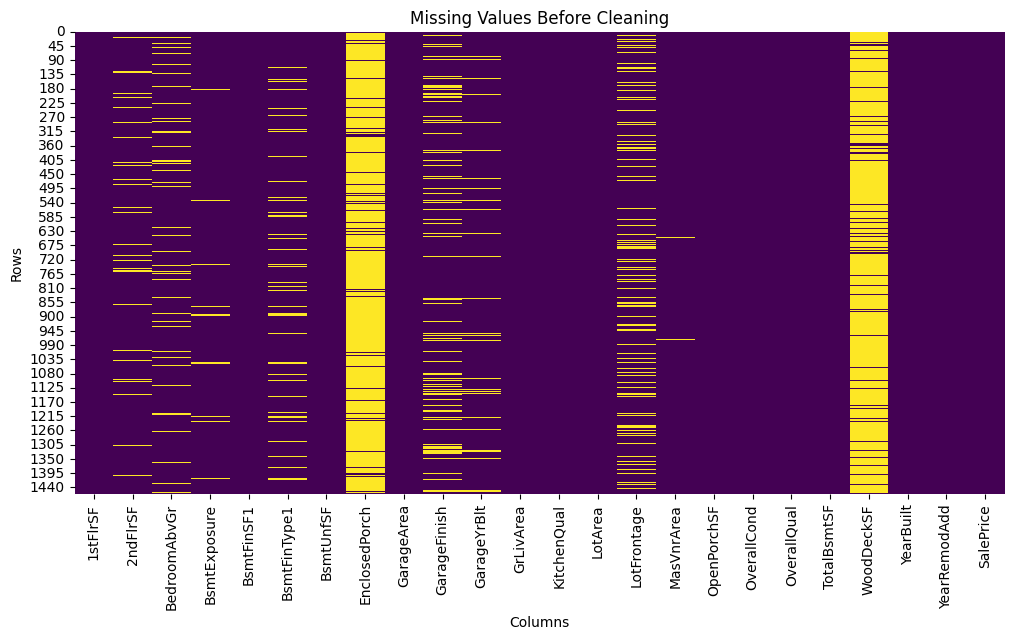

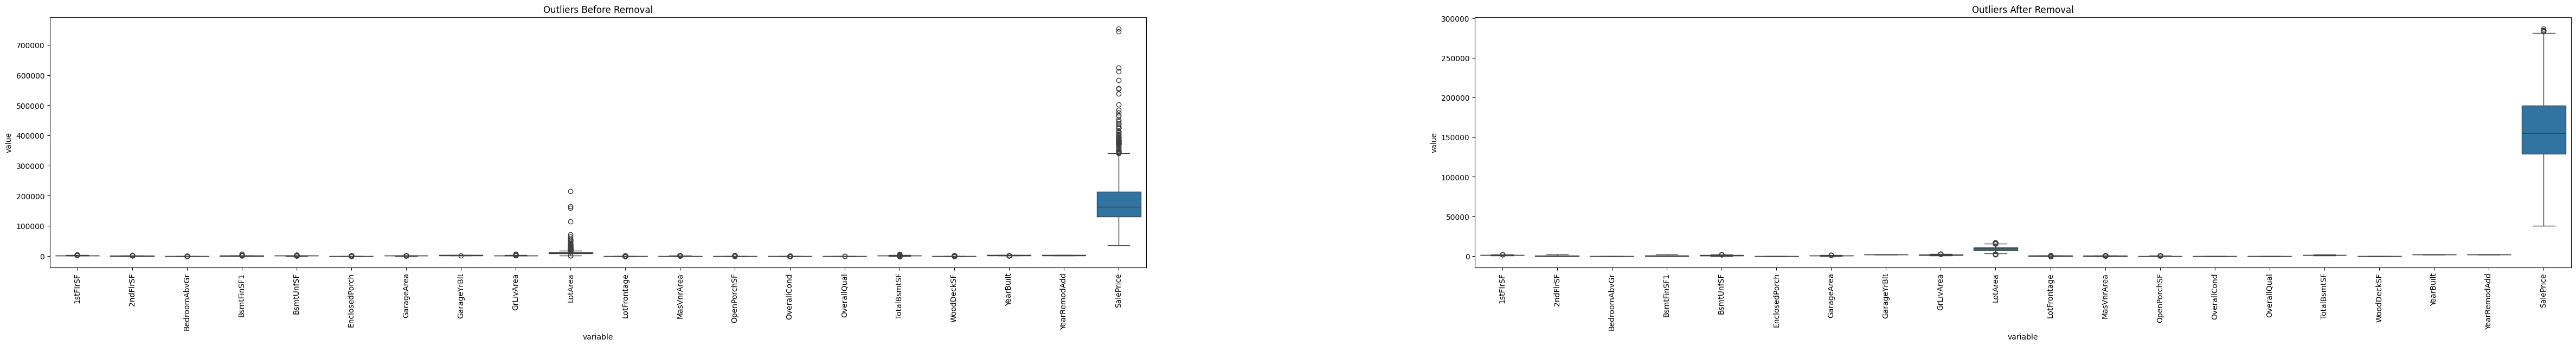


Final Summary Statistics:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
count,8.070000e+02,8.070000e+02,8.070000e+02,8.070000e+02,8.070000e+02,807.0,8.070000e+02,8.070000e+02,8.070000e+02,8.070000e+02,...,807,807,807,807,807,807,807,807,807,807
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,721,611,763,719,532,585,435,786,491,452
mean,-2.415801e-16,-1.760949e-17,3.213731e-16,1.981067e-17,7.043794e-17,0.0,6.163320e-17,4.406774e-15,-1.100593e-16,9.905336e-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.000620e+00,1.000620e+00,1.000620e+00,1.000620e+00,1.000620e+00,0.0,1.000620e+00,1.000620e+00,1.000620e+00,1.000620e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-2.308292e+00,-7.124376e-01,-2.825964e+00,-1.088110e+00,-1.422695e+00,0.0,-2.482788e+00,-2.936971e+00,-2.531629e+00,-2.686119e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-7.824382e-01,-7.124376e-01,-1.261799e+00,-1.088110e+00,-7.878204e-01,0.0,-7.553920e-01,-7.094000e-01,-7.830063e-01,-5.959892e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-1.735295e-01,-7.124376e-01,3.023665e-01,-6.876897e-02,-1.811625e-01,0.0,1.012384e-01,1.156264e-01,-4.945109e-02,-2.574977e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.287974e-01,1.028720e+00,3.023665e-01,7.097827e-01,6.255771e-01,0.0,6.044733e-01,9.406527e-01,7.179397e-01,6.067895e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Final shape of the dataset: (807, 33)


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure this path is correct)
house_prices_df = pd.read_csv('/workspace/house_project1/data/house_prices_records.csv')

# Function to visualize missing values
def visualize_missing_values(data, title='Missing Values'):
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Function to display summary statistics
def display_summary_statistics(data, title='Summary Statistics'):
    print(f"\n{title}:")
    display(data.describe(include='all'))

# Function to display final dataset shape
def display_final_shape(data):
    print(f"\nFinal shape of the dataset: {data.shape}")

# Function to handle missing values
def handle_missing_values(data):
    # Fill missing values for numerical features
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    # Fill missing values for categorical features
    for column in data.select_dtypes(include=[object]).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    return data

# Function to remove outliers based on IQR
def remove_outliers(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Function to normalize numerical features
def normalize_features(data):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    return data

# Function to clean house prices data with detailed output
def clean_house_prices(data):
    print("Initial shape of the dataset:", data.shape)
   
    # Display initial summary statistics
    display_summary_statistics(data, title='Initial Summary Statistics')

    # Step 1: Handle missing values
    visualize_missing_values(data, title='Missing Values Before Cleaning')
    data = handle_missing_values(data)

    # Step 2: Remove outliers
    data_before_outlier_removal = data.copy()
    data = remove_outliers(data)

    # Dynamic Boxplot Visualization for Outliers
    numerical_features = data.select_dtypes(include=[np.number]).columns
    n_features = len(numerical_features)
   
    # Adjusting layout based on the number of features
    fig, axes = plt.subplots(1, 2, figsize=(6 * n_features // 2, 6))  # Dynamic size
    plt.subplots_adjust(wspace=0.3)

    sns.boxplot(data=data_before_outlier_removal[numerical_features].melt(), x='variable', y='value', ax=axes[0])
    axes[0].set_title('Outliers Before Removal')
    axes[0].tick_params(axis='x', rotation=90)

    sns.boxplot(data=data[numerical_features].melt(), x='variable', y='value', ax=axes[1])
    axes[1].set_title('Outliers After Removal')
    axes[1].tick_params(axis='x', rotation=90)

    plt.show()

    # Step 3: Encode categorical variables
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')
    data = pd.get_dummies(data, drop_first=True)

    # Step 4: Normalize numerical features
    data = normalize_features(data)

    # Display final summary statistics
    display_summary_statistics(data, title='Final Summary Statistics')
   
    # Display final shape
    display_final_shape(data)
   
    return data

# Clean the house prices dataset and display results
house_prices_df_cleaned = clean_house_prices(house_prices_df)

---

In [40]:
import numpy as np
from datetime import datetime

# Define current year for calculations
CurrentYear = 2024

# Feature Engineering
house_prices_df_cleaned['TotalSF'] = house_prices_df_cleaned['TotalBsmtSF'] + house_prices_df_cleaned['1stFlrSF'] + house_prices_df_cleaned['2ndFlrSF']
house_prices_df_cleaned['TotalPorchSF'] = house_prices_df_cleaned['EnclosedPorch'] + house_prices_df_cleaned['OpenPorchSF'] + house_prices_df_cleaned['WoodDeckSF']
house_prices_df_cleaned['TotalBaths'] = house_prices_df_cleaned['FullBath'] + (house_prices_df_cleaned['HalfBath'] * 0.5) + \
                                        house_prices_df_cleaned['BsmtFullBath'] + (house_prices_df_cleaned['BsmtHalfBath'] * 0.5)
house_prices_df_cleaned['HouseAge'] = CurrentYear - house_prices_df_cleaned['YearBuilt']
house_prices_df_cleaned['YearsSinceRemodel'] = CurrentYear - house_prices_df_cleaned['YearRemodAdd']
house_prices_df_cleaned['GarageAge'] = CurrentYear - house_prices_df_cleaned['GarageYrBlt']
house_prices_df_cleaned['OverallQual_to_GrLivArea'] = house_prices_df_cleaned['OverallQual'] / house_prices_df_cleaned['GrLivArea']
house_prices_df_cleaned['OverallCond_to_TotalSF'] = house_prices_df_cleaned['OverallCond'] / house_prices_df_cleaned['TotalSF']
house_prices_df_cleaned['PricePerSF'] = house_prices_df_cleaned['SalePrice'] / house_prices_df_cleaned['TotalSF']

# Interaction Terms
house_prices_df_cleaned['OverallQual_x_GrLivArea'] = house_prices_df_cleaned['OverallQual'] * house_prices_df_cleaned['GrLivArea']
house_prices_df_cleaned['GarageCars_x_GarageArea'] = house_prices_df_cleaned['GarageCars'] * house_prices_df_cleaned['GarageArea']

# Log Transformation
for feature in ['LotArea', 'GrLivArea']:
    house_prices_df_cleaned[feature] = np.log1p(house_prices_df_cleaned[feature])

# Binarize Key Features
house_prices_df_cleaned['HighKitchenQual'] = np.where(house_prices_df_cleaned['KitchenQual'].isin(['Gd', 'Ex']), 1, 0)

# Check results
print("Engineered Feature Summary:")
display(house_prices_df_cleaned[['TotalSF', 'TotalPorchSF', 'TotalBaths', 'HouseAge', 'YearsSinceRemodel', 'GarageAge',
                                 'OverallQual_to_GrLivArea', 'OverallCond_to_TotalSF', 'PricePerSF', 'OverallQual_x_GrLivArea',
                                 'GarageCars_x_GarageArea', 'HighKitchenQual']].describe())


KeyError: 'FullBath'

In [41]:
print(house_prices_df.columns)

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
       'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')


NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
